# FEMA Disaster Cost Forecasting
#### Capstone 2 - Modeling
Michael Garber

* Please run these notebooks in order to create needed data for this notebook.
    * On Github 
        1. > [FEMA-DataWrangling.ipynb on Github](https://github.com/mdgarber/FEMADisasterCostForecasting/blob/ef70129c4bf06a38b13c61e1254fdb6a3105486b/femadisastercostforecasting/notebooks/FEMA-DataWrangling.ipynb)
        2. > [FEMA-EDA.ipynb on Github](https://github.com/mdgarber/FEMADisasterCostForecasting/blob/ef70129c4bf06a38b13c61e1254fdb6a3105486b/femadisastercostforecasting/notebooks/FEMA-EDA.ipynb)
        3. > [FEMA-Preprocessinging.ipynb on Github](https://github.com/mdgarber/FEMADisasterCostForecasting/blob/2f76bf8a14b23fe31cdf044209ef6cdbcad78fb6/femadisastercostforecasting/notebooks/FEMA-Preprocessing.ipynb)
    * OR local path
        1. > /FEMADisasterCostForecasting/femadisastercostforecasting/notebooks/FEMA-DataWrangling.ipynb
        2. > /FEMADisasterCostForecasting/femadisastercostforecasting/notebooks/FEMA-EDA.ipynb
        3. > /FEMADisasterCostForecasting/femadisastercostforecasting/notebooks/FEMA-Preprocessing.ipynb

#### Modeling High-Level Steps

> **Goal**: Build two to three different models and identify the best one.

1. Import Libraries
2. Import Data
3. Review model types
4. Choose 2-3 models
5. Additional EDA
6. Feature engineering 
7. Train/Test Split
8. Preprocessing
9. Hyperparameter tuning
10. Fit models to training data
11. Make Predictions and Evaluate Models

## Step 1 - Import libraries

In [5]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

## Step 2 - Import Data

In [7]:
# load data
femaDataCleanV3 = pd.read_csv('../data/interim/femaDataCleanV3.csv', low_memory=False)   

## using "low_memory=False" to prevent error..."DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False."

## Step 3 - Review Model Types

[Machine Learning Algorithms - Datacamp](https://www.datacamp.com/cheat-sheet/machine-learning-cheat-sheet)

## Step 4 - Choose 2-3 models

1. Linear Regression
2. Lasso Regression
3. Random Forests


## Step 5 - Additional EDA

1. Review features
2. Feature Selection 
    1. feature correlation to target
    2. Variance threshold  
    3. feature importance from tree model (later?)
3. Find time range of the data

In [11]:
# Review all features
femaDataCleanV3.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 134 columns):
 #    Column                                Non-Null Count  Dtype  
---   ------                                --------------  -----  
 0    declarationDate                       5013 non-null   object 
 1    disasterName                          5013 non-null   object 
 2    incidentBeginDate                     5013 non-null   object 
 3    incidentEndDate                       4693 non-null   object 
 4    declarationType                       5013 non-null   object 
 5    stateName                             5013 non-null   object 
 6    entryDate                             5013 non-null   object 
 7    updateDate                            5013 non-null   object 
 8    closeoutDate                          3969 non-null   object 
 9    ihProgramDeclared                     5013 non-null   float64
 10   iaProgramDeclared                     5013 non-null   float64
 11   pa

In [12]:
# Set the maximum number of rows to be displayed from pandas DataFramae 
pd.set_option('display.max_rows', 150)

In [13]:
# check feature correlations to target (totalDisasterCost)
tempVar = femaDataCleanV3.select_dtypes(exclude='object').corr()

# see top linearly correlated features
pd.DataFrame(tempVar['totalDisasterCost'].sort_values(ascending=False))
# step drop off in linear correlation from totalNumberIaApproved to ihProgramDeclared

,totalDisasterCost
totalDisasterCost,1.000000
totalObligatedAmountPa,0.991616
totalObligatedAmountPa_StdScaled,0.991616
totalObligatedAmountCatC2g,0.854022
totalObligatedAmountCatC2g_StdScaled,0.854022
totalObligatedAmountCatAb_StdScaled,0.727417
totalObligatedAmountCatAb,0.727417
totalObligatedAmountHmgp_StdScaled,0.691447
totalObligatedAmountHmgp,0.691447
totalAmountOnaApproved,0.645164


<Axes: >

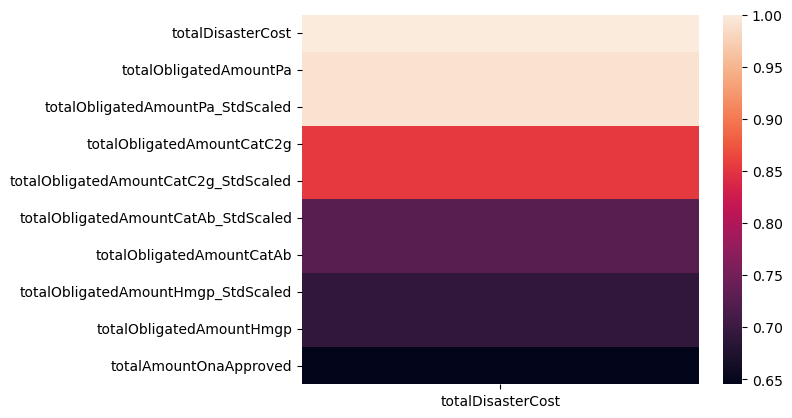

In [14]:
# heat map - feature correlation to target
sns.heatmap(pd.DataFrame(tempVar['totalDisasterCost'].sort_values(ascending=False)).head(10))

In [15]:
# check the standard deviation of features - a low variance implies a feature is low value as an explanatory variable
femaDataStdDevs = pd.DataFrame(femaDataCleanV3.std(numeric_only=True), columns=['Standard Deviation']).sort_values(by='Standard Deviation', ascending=False)

femaDataStdDevs

# values already normal scaled are std ~= 1

,Standard Deviation
totalDisasterCost,1.481159e+09
totalObligatedAmountPa,6.947603e+08
totalObligatedAmountCatC2g,4.526207e+08
totalObligatedAmountCatAb,3.630115e+08
totalAmountIhpApproved,9.396792e+07
totalAmountHaApproved,6.552160e+07
totalObligatedAmountHmgp,3.576138e+07
totalAmountOnaApproved,3.228710e+07
totalNumberIaApproved,2.714044e+04
totalObligatedAmountCatC2g_StdScaled,1.000100e+00


In [16]:
# find time range of data
oldestIncident = pd.to_datetime(femaDataCleanV3.incidentBeginDate).min()
latestIncident = pd.to_datetime(femaDataCleanV3.incidentBeginDate).max()

print('The time range of the data is between...\n' + str(oldestIncident) + ' and ' + str(latestIncident))

The time range of the data is between...
1953-05-02 00:00:00+00:00 and 2024-11-11 00:00:00+00:00


## Step 6 - Feature Engineering
    1. specify and filter discrete time range for analysis (e.x. 10 years leading to 2025)
    2. *Derive Annual summary table for key features grouped features*
        1. features to engineer: Incident year

In [18]:
# create new DataFrame
femaDataCleanV4 = femaDataCleanV3.copy()

# create new column - incidentYear
femaDataCleanV4['incidentYear'] = pd.to_datetime(femaDataCleanV3['incidentBeginDate']).dt.year

# filter data to years: 1980-2023 - new DF 'femaDataCleanV4'
femaDataCleanV4 = femaDataCleanV4.loc[(femaDataCleanV4['incidentYear'] >= 1980) & (femaDataCleanV4['incidentYear'] <= 2023)].copy()

#### Note 
- FEMA was established in 1979
- Disaster/Incident data was collected starting in 1953, but no FEMA funding actions occurred until 1980
- [https://www.fema.gov/about/history](https://www.fema.gov/about/history)

In [20]:
# create annual summary table
femaDataCleanV4.head()

,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateName,entryDate,updateDate,closeoutDate,ihProgramDeclared,...,region_9,region_10,totalAmountIhpApproved_StdScaled,totalAmountHaApproved_StdScaled,totalAmountOnaApproved_StdScaled,totalObligatedAmountPa_StdScaled,totalObligatedAmountCatAb_StdScaled,totalObligatedAmountCatC2g_StdScaled,totalObligatedAmountHmgp_StdScaled,incidentYear
99,2024-05-15T00:00:00.000Z,SEVERE STORMS AND FLOODING,2023-09-11T00:00:00.000Z,2023-09-13T00:00:00.000Z,Major Disaster,Massachusetts,2024-05-16T00:00:00.000Z,2024-05-16T00:00:00.000Z,NaN,1.0,...,False,False,0.003042,0.007849,-0.007075,-0.069262,-0.073007,-0.041418,-0.083414,2023
113,2024-04-06T00:00:00.000Z,"SEVERE STORM, FLOODING, AND LANDSLIDES",2023-11-20T00:00:00.000Z,2023-11-20T00:00:00.000Z,Major Disaster,Alaska,2024-04-06T00:00:00.000Z,2024-04-06T00:00:00.000Z,NaN,0.0,...,False,True,-0.077313,-0.068038,-0.086938,-0.069262,-0.073007,-0.041418,-0.083414,2023
115,2024-03-20T00:00:00.000Z,SEVERE STORM AND FLOODING,2023-12-17T00:00:00.000Z,2023-12-19T00:00:00.000Z,Major Disaster,Rhode Island,2024-03-21T00:00:00.000Z,2024-03-21T00:00:00.000Z,NaN,1.0,...,False,False,-0.010534,0.024797,-0.080979,-0.069262,-0.073007,-0.041418,-0.083414,2023
117,2024-03-15T00:00:00.000Z,"SEVERE STORM, LANDSLIDES, AND MUDSLIDES",2023-11-20T00:00:00.000Z,2023-11-20T00:00:00.000Z,Major Disaster,Alaska,2024-03-16T00:00:00.000Z,2024-03-19T00:00:00.000Z,NaN,1.0,...,False,True,-0.076494,-0.067289,-0.086074,-0.069262,-0.073007,-0.041418,-0.083414,2023
118,2024-03-02T00:00:00.000Z,SEVERE STORM AND FLOODING,2023-12-18T00:00:00.000Z,2023-12-19T00:00:00.000Z,Major Disaster,Vermont,2024-03-02T00:00:00.000Z,2024-03-02T00:00:00.000Z,NaN,0.0,...,False,False,-0.077313,-0.068038,-0.086938,-0.069262,-0.073007,-0.041418,-0.083414,2023


In [21]:
# create Annual summaries table for year-by-year analysis
femaAnnualStats = femaDataCleanV4.select_dtypes(exclude='object').copy()

# Create grouped and summed totals by year
femaAnnualStats = femaAnnualStats.groupby(by='incidentYear').sum().copy()

In [22]:
# remove already scaled features (*Std_scaled)
femaAnnualStats = femaAnnualStats.drop(columns=['totalAmountIhpApproved_StdScaled',
                                                'totalAmountHaApproved_StdScaled', 
                                                'totalAmountOnaApproved_StdScaled',
                                                'totalObligatedAmountPa_StdScaled',
                                                'totalObligatedAmountCatAb_StdScaled',
                                                'totalObligatedAmountCatC2g_StdScaled',
                                                'totalObligatedAmountHmgp_StdScaled']).copy()

In [23]:
# display annual summary table
femaAnnualStats.head()

,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,...,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10
incidentYear,,,,,,,,,,,,,,,,,,,,,
1980,0.0,22.0,23.0,22.0,0.0,0.0,0.0,0.0,131270.0,131270.0,...,1,2,3,3,5,5,2,1,7,2
1981,0.0,13.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,3,2,3,1,1,5,2
1982,0.0,21.0,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,5,5,5,3,2,4,1
1983,0.0,19.0,21.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,5,1,8,0,1,9,2
1984,0.0,28.0,31.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,4,3,8,2,7,5,6,1,2


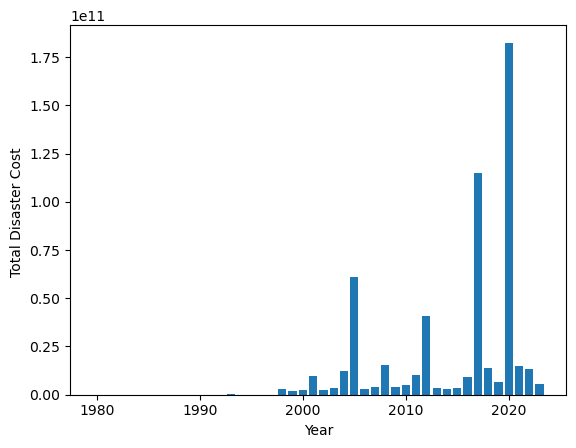

In [24]:
# chart total disaster cost annually
plt.bar(x=femaAnnualStats.index, height=femaAnnualStats['totalDisasterCost'])
plt.xlabel('Year')
plt.ylabel('Total Disaster Cost ')
plt.show()

## Step 7 - Train/Test Split

In [26]:
# set X & y
y = femaAnnualStats['totalDisasterCost']
X = femaAnnualStats.drop(columns=['totalDisasterCost']).to_numpy()

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

## Step 8 -  Preprocessing
    1. Linear regression model - use robust scaler to handle outliers
    2. Lasso regression model - use standard scaler
    3. Random Forest regression model - shouldn't need scaling

In [28]:
# Preprocessing - Make robust scaled data set 
#  (for linear regression as it is outlier sensitive)

# standard scale
standardScaler = StandardScaler().fit(X_train)
X_train_std    = standardScaler.transform(X_train)
X_test_std     = standardScaler.transform(X_test)

# robust scale X
robustScaler   = RobustScaler().fit(X_train)
X_train_robust = robustScaler.transform(X_train)
X_test_robust  = robustScaler.transform(X_test)

## Step 9 - Hyperparameter Tuning
> https://scikit-learn.org/stable/modules/grid_search.html

- Linear Regression
    - *Does not use hyperparameters but sensitive outliers. Using a robust scaled data set to handle outliers*
- Lasso Regression
    - regularization parameter (alpha)
- Random Forests
    - n_estimators
    - max_features
    - max_depth

In [30]:
# Lasso Regression - Tune regularization parameter (alpha)

# will use LassoCV which performs built-in hyperparameter search
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [31]:
# Create Random Forests regression object - Tune n_estimators, max_features, max_depth
randomForestReg = RandomForestRegressor(random_state = 11)

# set parameters for randomizedSearchCV
param_dist = {
    'n_estimators': randint(1, 100),
    'max_features': randint(1, 100),
    'max_depth': randint(1, 50)
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator = randomForestReg, 
    param_distributions = param_dist, 
    n_iter = 60, 
    cv = 5, 
    scoring = 'neg_mean_squared_error', 
    random_state = 11
)

# Fit the randomized search to data
random_search.fit(X, y)

# Get the best parameters and best estimator
print("Best estimator: ", random_search.best_estimator_)

Best estimator:  RandomForestRegressor(max_depth=5, max_features=34, n_estimators=2,
                      random_state=11)


## Step 10 - Fit models to training data

In [33]:
# Linear Regression (no scaling)
linReg = LinearRegression().fit(X_train, y_train)

# score linear regression model
print('Linear Regression R^2 Score: ' + str(linReg.score(X_test, y_test)))

Linear Regression R^2 Score: 1.0


In [34]:
# fund values have 1.0 coefficients throwing off model
linReg.coef_

array([ 1.27611016e-07,  9.65693878e-08,  2.39295552e-08, -7.97013459e-08,
        2.70665221e-11,  1.33333333e+00,  6.66666667e-01,  6.66666667e-01,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -8.90846308e-08, -1.04343689e-14,  1.33409730e-07,  2.82013454e-09,
       -1.05897583e-07,  2.19288504e-07,  2.91996878e-07, -1.40746963e-07,
        2.79777318e-07, -1.59770388e-07, -2.42703547e-07,  4.94096162e-07,
        3.02478414e-08, -3.57658928e-07, -1.07438025e-06,  1.26089450e-07,
       -1.25879301e-07,  2.71760016e-14, -7.23540717e-08, -5.66562682e-08,
       -1.13082046e-07,  0.00000000e+00,  0.00000000e+00,  2.11947493e-07,
       -5.87639916e-07,  0.00000000e+00,  1.50435509e-07, -2.40902426e-07,
       -7.21512803e-07,  8.68230013e-08,  2.09305448e-07, -6.26160266e-07,
       -3.36345755e-08,  3.20619291e-07, -1.83284805e-07,  3.30751687e-07,
       -1.25610018e-08, -2.89750248e-08, -2.22241129e-07,  2.81799579e-07,
       -3.07171599e-08, -

In [35]:
i = 1
for col in femaAnnualStats.columns:
    print(str(i) + ' - ' + col)
    i += 1
    
    

1 - ihProgramDeclared
2 - iaProgramDeclared
3 - paProgramDeclared
4 - hmProgramDeclared
5 - totalNumberIaApproved
6 - totalAmountIhpApproved
7 - totalAmountHaApproved
8 - totalAmountOnaApproved
9 - totalObligatedAmountPa
10 - totalObligatedAmountCatAb
11 - totalObligatedAmountCatC2g
12 - totalObligatedAmountHmgp
13 - totalDisasterCost
14 - incidentType_Biological
15 - incidentType_Chemical
16 - incidentType_Coastal Storm
17 - incidentType_Dam/Levee Break
18 - incidentType_Drought
19 - incidentType_Earthquake
20 - incidentType_Fire
21 - incidentType_Fishing Losses
22 - incidentType_Flood
23 - incidentType_Freezing
24 - incidentType_Human Cause
25 - incidentType_Hurricane
26 - incidentType_Mud/Landslide
27 - incidentType_Other
28 - incidentType_Severe Ice Storm
29 - incidentType_Severe Storm
30 - incidentType_Snowstorm
31 - incidentType_Straight-Line Winds
32 - incidentType_Terrorist
33 - incidentType_Tornado
34 - incidentType_Toxic Substances
35 - incidentType_Tropical Storm
36 - incide

In [36]:
# Linear Regression (robust scaled)
linReg_robust = LinearRegression().fit(X_train_robust, y_train)

# score linear regression model
print('Linear Regression (robust scaled) R^2 Score: ' + str(linReg_robust.score(X_test_robust, y_test)))

Linear Regression (robust scaled) R^2 Score: 0.9089491488939093


In [37]:
# Lasso Linear Regression w/ hyperparameter tuning
lassoRegCV = LassoCV(cv = 5, random_state = 11).fit(X_train, y_train)

# score linear regression model
print('Linear Regression (Lasso) R^2 Score: ' + str(lassoRegCV.score(X_test, y_test)))

# most important features - totalAmountIhpApproved, totalObligatedAmountPa, totalObligatedAmountCatC2g

Linear Regression (Lasso) R^2 Score: 0.9945278942129459


In [38]:
# Random Forests (using tuned hyperparameters)
#     Best estimator:  RandomForestRegressor(max_depth=5, max_features=34, n_estimators=2,random_state=11)
randForestReg = RandomForestRegressor(max_depth = 5, max_features = 34, n_estimators = 2, random_state = 11)
randForestReg = randForestReg.fit(X_train, y_train)

# score Random Forests model
print('Random Forests R^2 Score: ' + str(randForestReg.score(X_test, y_test)))

Random Forests R^2 Score: -0.2954956431840814


## Step 11 - Make Predictions and Evaluate Models

In [40]:
# Make predictions
y_pred_linReg = linReg.predict(X_test)
y_pred_linReg_robust = linReg_robust.predict(X_test_robust)
y_pred_lassoRegCV = lassoRegCV.predict(X_test)
y_pred_randForest = randForestReg.predict(X_test)

# Evaluate Models
MSE_linReg = mean_squared_error(y_test, y_pred_linReg)
MSE_linReg_robust = mean_squared_error(y_test, y_pred_linReg_robust)
MSE_lassoRegCV = mean_squared_error(y_test, y_pred_lassoRegCV)
MSE_randForest = mean_squared_error(y_test, y_pred_randForest)

In [41]:
# Print Results
print('MSE - Linear Regression: ' + str(MSE_linReg))
print('MSE - Linear Regression (robust): ' + str(MSE_linReg_robust))
print('MSE - Linear Regression (Lasso): ' + str(MSE_lassoRegCV))
print('MSE - Random Forest: ' + str(MSE_randForest))

MSE - Linear Regression: 4.3416912941976565e-09
MSE - Linear Regression (robust): 9.401912302941797e+19
MSE - Linear Regression (Lasso): 5.650497287758072e+18
MSE - Random Forest: 1.3377290028698197e+21


#### data quality checks / review
DQ checks
---------
- is femaDatacleanV4.totalDisasterCostcorrect?
- is femaAnnualStats.totalDisasterCost correct?
- any data leakage (from X <> y) during or after train/test split?
- any columns accidentally copied over to other columns?
- for linear regression, any multi-colinearity? If so, remove the columns from data set that are least important of any collinear pair
    - run a correlation matrix on the dollar amount funded fields. columns > .8 should be removed
- spot check fishy values (negatives, possible duplicates) 
- addiotnal ref: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/


In [62]:
# - is femaDatacleanV4.totalDisasterCostcorrect?
femaDataCleanV4[['totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved', 
                 'totalObligatedAmountPa', 'totalObligatedAmountCatAb','totalObligatedAmountCatC2g', 
                 'totalObligatedAmountHmgp', 'totalDisasterCost']]


,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp,totalDisasterCost
99,7550012.08,4971699.77,2578312.31,0.00,0.00,0.00,0.0,15100024.16
113,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
115,6274435.38,6082049.92,192385.46,0.00,0.00,0.00,0.0,12548870.76
117,76979.77,49058.23,27921.54,0.00,0.00,0.00,0.0,153959.54
118,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...
4282,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
4283,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
4284,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
4285,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00


In [138]:
fundAmountCols = ['totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved',
                            'totalObligatedAmountPa', 'totalObligatedAmountCatAb','totalObligatedAmountCatC2g', 
                            'totalObligatedAmountHmgp']

i = 20
for row in femaAnnualStats[fundAmountCols]:
    print(str(femaAnnualStats[fundAmountCols].iloc[i].sum()) + ' - totalDisasterCost: ' + str(femaAnnualStats['totalDisasterCost'].iloc[i]) )
    i += 1


2397419768.46 - totalDisasterCost: 2397419768.46
9550696011.08 - totalDisasterCost: 9550696011.08
2195943387.66 - totalDisasterCost: 2195943387.66
3690776544.1 - totalDisasterCost: 3690776544.1
12395424863.12 - totalDisasterCost: 12395424863.12
61049499228.11001 - totalDisasterCost: 61049499228.11
3049954188.98 - totalDisasterCost: 3049954188.98


AttributeError: 'list' object has no attribute 'get_label'

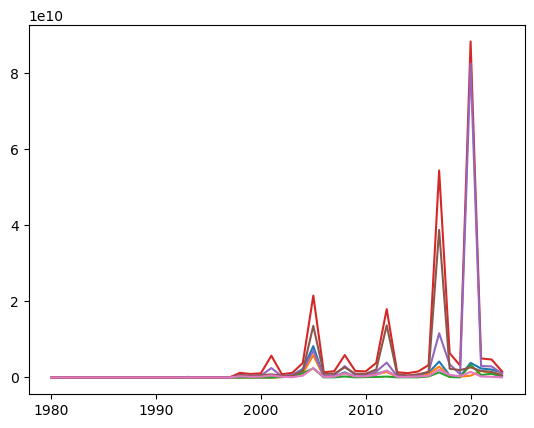

In [156]:
plt.plot(femaAnnualStats['totalAmountIhpApproved'])
plt.plot(femaAnnualStats['totalAmountHaApproved'])
plt.plot(femaAnnualStats['totalAmountOnaApproved'])
plt.plot(femaAnnualStats['totalObligatedAmountPa'])
plt.plot(femaAnnualStats['totalObligatedAmountCatAb'])
plt.plot(femaAnnualStats['totalObligatedAmountCatC2g'])
plt.plot(femaAnnualStats['totalObligatedAmountHmgp'])
plt.legend(handles=[fundAmountCols])
plt.show()

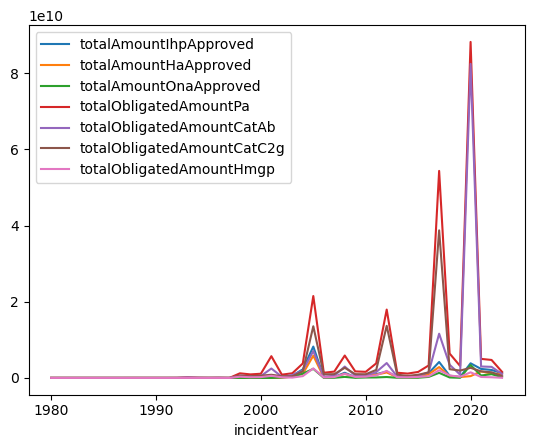

In [174]:
femaAnnualStats[fundAmountCols].plot()
#femaAnnualStats['totalDisasterCost'].plot()
plt.show()

In [176]:
femaAnnualStats[fundAmountCols]

,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp
incidentYear,,,,,,,
1980,0.000000e+00,0.000000e+00,0.000000e+00,1.312700e+05,1.312700e+05,0.000000e+00,0.000000e+00
1981,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1982,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1983,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1984,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1985,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1986,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1987,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1988,0.000000e+00,0.000000e+00,0.000000e+00,4.029932e+06,3.720871e+06,3.090612e+05,0.000000e+00


multi-collinearity found (hierarchical/constituent features)
------------------
- totalAmountIhpApproved (The total amount approved for the Individual and Households Program (IHP) in dollars)
    - totalAmountHaApproved
    - totalAmountOnaApproved

- totalObligatedAmountPa	(The Public Assistance grant funding available in dollars to the grantee (State), for sub-grantee approved Project Worksheets)
    - totalObligatedAmountCatAb
    - totalObligatedAmountCatC2g

- totalObligatedAmountHmgp (Total amount obligated under the Hazard Mitigation Grant Program in dollars. )


source:
https://www.fema.gov/openfema-data-page/fema-web-disaster-summaries-v1

In [114]:
femaDataCleanV4[fundAmountCols]

,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp
99,7550012.08,4971699.77,2578312.31,0.00,0.00,0.00,0.0
113,0.00,0.00,0.00,0.00,0.00,0.00,0.0
115,6274435.38,6082049.92,192385.46,0.00,0.00,0.00,0.0
117,76979.77,49058.23,27921.54,0.00,0.00,0.00,0.0
118,0.00,0.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...
4282,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4283,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4284,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4285,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [ ]:
fundAmountCols = ['totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved',
                            'totalObligatedAmountPa', 'totalObligatedAmountCatAb','totalObligatedAmountCatC2g', 
                            'totalObligatedAmountHmgp']

i = 20
for row in femaAnnualStats[fundAmountCols]:
    print(str(femaAnnualStats[fundAmountCols].iloc[i].sum()) + ' - totalDisasterCost: ' + str(femaAnnualStats['totalDisasterCost'].iloc[i]) )
    i += 1

In [211]:
print(femaDataCleanV4[['totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved']])
print(femaDataCleanV4[['totalAmountHaApproved', 'totalAmountOnaApproved']].sum(axis=0) + femaDataCleanV4[['totalAmountHaApproved', 'totalAmountOnaApproved']])

      totalAmountIhpApproved  totalAmountHaApproved  totalAmountOnaApproved
99                7550012.08             4971699.77              2578312.31
113                     0.00                   0.00                    0.00
115               6274435.38             6082049.92               192385.46
117                 76979.77               49058.23                27921.54
118                     0.00                   0.00                    0.00
...                      ...                    ...                     ...
4282                    0.00                   0.00                    0.00
4283                    0.00                   0.00                    0.00
4284                    0.00                   0.00                    0.00
4285                    0.00                   0.00                    0.00
4982                    0.00                   0.00                    0.00

[4125 rows x 3 columns]
totalAmountHaApproved     2.134060e+10
totalAmountOnaApproved  

In [ ]:

'''
6 - totalAmountIhpApproved
7 - totalAmountHaApproved
8 - totalAmountOnaApproved
9 - totalObligatedAmountPa
10 - totalObligatedAmountCatAb
11 - totalObligatedAmountCatC2g
12 - totalObligatedAmountHmgp
13 - totalDisasterCost
'''

In [214]:
femaDataCleanV4[fundAmountCols]

,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp
99,7550012.08,4971699.77,2578312.31,0.00,0.00,0.00,0.0
113,0.00,0.00,0.00,0.00,0.00,0.00,0.0
115,6274435.38,6082049.92,192385.46,0.00,0.00,0.00,0.0
117,76979.77,49058.23,27921.54,0.00,0.00,0.00,0.0
118,0.00,0.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...
4282,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4283,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4284,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4285,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [241]:
#new total disaster cost


'''
6 - totalAmountIhpApproved
7 - totalAmountHaApproved
8 - totalAmountOnaApproved
9 - totalObligatedAmountPa
10 - totalObligatedAmountCatAb
11 - totalObligatedAmountCatC2g
12 - totalObligatedAmountHmgp
13 - totalDisasterCost
'''

fundAmountColsTDC = ['totalObligatedAmountCatAb',
                     'totalObligatedAmountCatC2g']

i = 23
for row in femaDataCleanV4[fundAmountColsTDC]:
    print(str(femaDataCleanV4[fundAmountColsTDC].iloc[i].sum()) + ' - totalObligatedAmountPa: ' + str(femaDataCleanV4['totalObligatedAmountPa'].iloc[i]) )
    i += 1

0.0 - totalObligatedAmountPa: 0.0
559295.9199999999 - totalObligatedAmountPa: 648187.75


#### TODO

random forest regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html